In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage

In [44]:
genres=movies.genres.str.get_dummies()
genres.head()

(no genres listed)  Action  Adventure  Animation  Children  Comedy  Crime  \
0                   0       0          1          1         1       1      0   
1                   0       0          1          0         1       0      0   
2                   0       0          0          0         0       1      0   
3                   0       0          0          0         0       1      0   
4                   0       0          0          0         0       1      0   

   Documentary  Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  Mystery  \
0            0      0        1          0       0     0        0        0   
1            0      0        1          0       0     0        0        0   
2            0      0        0          0       0     0        0        0   
3            0      1        0          0       0     0        0        0   
4            0      0        0          0       0     0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0         0    0        0  
1        0       0         0    0        0  
2        1       0         0    0        0  
3        1       0         0    0        0  
4        0       0         0    0        0

In [45]:
df_movies=pd.concat([movies,genres],axis=1)
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
0          1          1         1       1      0  ...          0       0   
1          1          0         1       0      0  ...          0       0   
2          0          0         0       1      0  ...          0       0   
3          0          0         0       1      0  ...          0       0   
4          0          0         0       1      0  ...          0       0   

   IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0     0        0        0        0       0         0    0        0  
1     0        0        0        0       0         0    0        0  
2     0        0        0        1       0         0    0        0  
3     0        0        0        1       0         0    0        0  
4     0        0        0        0       0         0    0        0  

[5 rows x 23 columns]

In [46]:
scaler=StandardScaler()
genres_scaled=scaler.fit_transform(genres)
genres_scaled

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [47]:
n_cluster=3
model=KMeans(n_cluster)
model.fit(genres_scaled)
print(f'Grupos {model.labels_}')

Grupos [0 0 1 ... 1 0 1]


In [48]:
print(genres.columns,model.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object') [[-0.05917995  0.29860129  1.32252244  2.06875796  1.78588931  0.02614506
  -0.31912823 -0.19900416 -0.64355757  1.3716923  -0.09492563 -0.25421901
   0.64656175  0.33372916 -0.12761963 -0.27409263  0.31005662 -0.43063408
  -0.16246477 -0.09509761]
 [ 0.03255133 -0.21693681 -0.16759016 -0.25277299 -0.19532169  0.21112234
  -0.27728424  0.11503079  0.08240161 -0.16868932 -0.08985189 -0.11592317
  -0.1032046   0.01182363 -0.21955531  0.16737603 -0.10433433 -0.48683648
   0.07177162  0.04322229]
 [-0.05917995  0.43573718 -0.13447793 -0.23476917 -0.26223595 -0.56072343
   0.85932218 -0.21350152  0.06322686 -0.15283271  0.2747957   0.41137613
  -0.01038362 -0.17476494  0.62645332 -0.31733078  0.13774835  1.45279007
 

In [49]:
clusters=pd.DataFrame(model.cluster_centers_,columns=genres.columns)
clusters

(no genres listed)    Action  Adventure  Animation  Children    Comedy  \
0           -0.059180  0.298601   1.322522   2.068758  1.785889  0.026145   
1            0.032551 -0.216937  -0.167590  -0.252773 -0.195322  0.211122   
2           -0.059180  0.435737  -0.134478  -0.234769 -0.262236 -0.560723   

      Crime  Documentary     Drama   Fantasy  Film-Noir    Horror      IMAX  \
0 -0.319128    -0.199004 -0.643558  1.371692  -0.094926 -0.254219  0.646562   
1 -0.277284     0.115031  0.082402 -0.168689  -0.089852 -0.115923 -0.103205   
2  0.859322    -0.213502  0.063227 -0.152833   0.274796  0.411376 -0.010384   

    Musical   Mystery   Romance    Sci-Fi  Thriller       War   Western  
0  0.333729 -0.127620 -0.274093  0.310057 -0.430634 -0.162465 -0.095098  
1  0.011824 -0.219555  0.167376 -0.104334 -0.486836  0.071772  0.043222  
2 -0.174765  0.626453 -0.317331  0.137748  1.452790 -0.116686 -0.071454

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

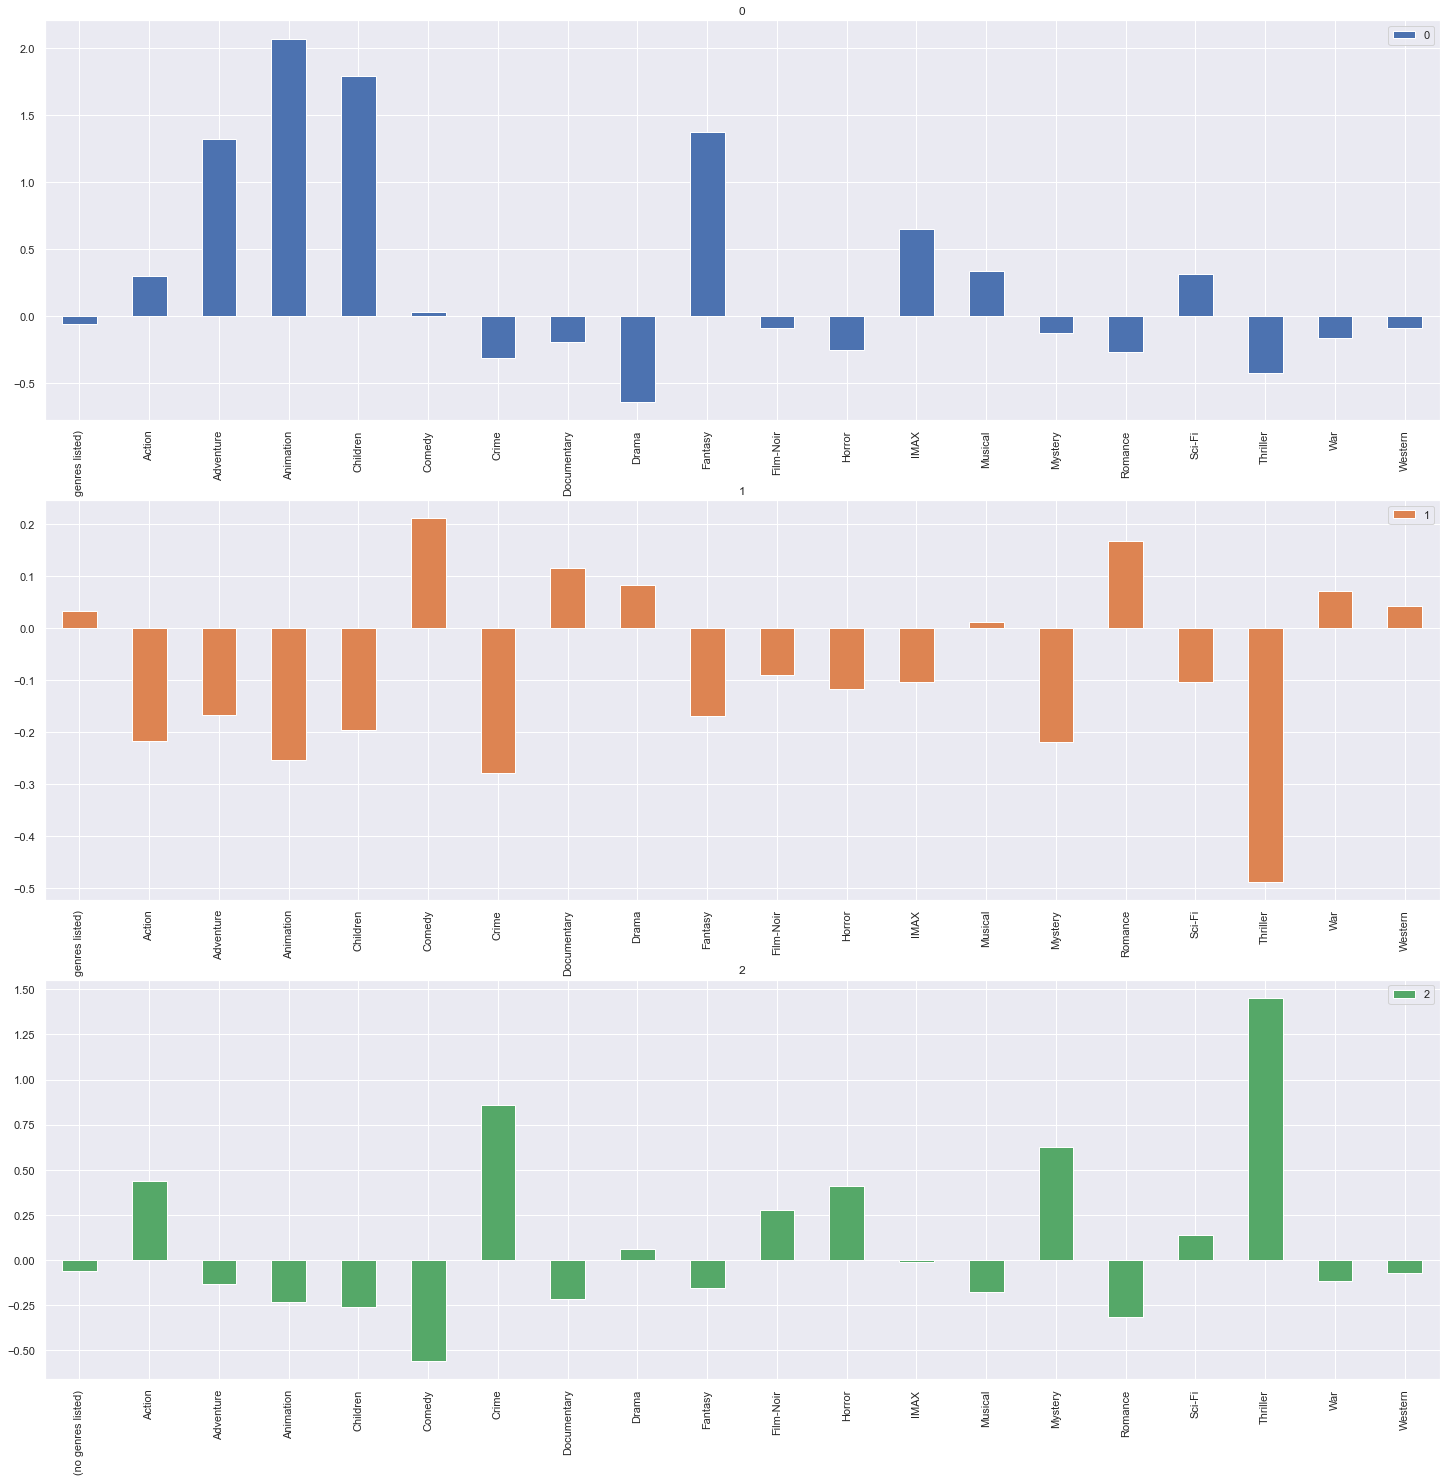

In [50]:
clusters.transpose().plot.bar(subplots=True,figsize=(25,25),sharex=False)

In [51]:
group=0
filter=model.labels_==group
df_movies[filter]

movieId                                              title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
7           8                                Tom and Huck (1995)   
12         13                                       Balto (1995)   
28         29  City of Lost Children, The (Cité des enfants p...   
...       ...                                                ...   
9733   193567  anohana: The Flower We Saw That Day - The Movi...   
9735   193573            Love Live! The School Idol Movie (2015)   
9737   193581          Black Butler: Book of the Atlantic (2017)   
9738   193583                       No Game No Life: Zero (2017)   
9740   193587                Bungo Stray Dogs: Dead Apple (2018)   

                                           genres  (no genres listed)  Action  \
0     Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                      Adventure|Children|Fantasy                   0       0   
7                              Adventure|Children                   0       0   
12                   Adventure|Animation|Children                   0       0   
28         Adventure|Drama|Fantasy|Mystery|Sci-Fi                   0       0   
...                                           ...                 ...     ...   
9733                              Animation|Drama                   0       0   
9735                                    Animation                   0       0   
9737              Action|Animation|Comedy|Fantasy                   0       1   
9738                     Animation|Comedy|Fantasy                   0       0   
9740                             Action|Animation                   0       1   

      Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
0             1          1         1       1      0  ...          0       0   
1             1          0         1       0      0  ...          0       0   
7             1          0         1       0      0  ...          0       0   
12            1          1         1       0      0  ...          0       0   
28            1          0         0       0      0  ...          0       0   
...         ...        ...       ...     ...    ...  ...        ...     ...   
9733          0          1         0       0      0  ...          0       0   
9735          0          1         0       0      0  ...          0       0   
9737          0          1         0       1      0  ...          0       0   
9738          0          1         0       1      0  ...          0       0   
9740          0          1         0       0      0  ...          0       0   

      IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0        0       0         0    0        0  
1        0        0        0        0       0         0    0        0  
7        0        0        0        0       0         0    0        0  
12       0        0        0        0       0         0    0        0  
28       0        0        1        0       1         0    0        0  
...    ...      ...      ...      ...     ...       ...  ...      ...  
9733     0        0        0        0       0         0    0        0  
9735     0        0        0        0       0         0    0        0  
9737     0        0        0        0       0         0    0        0  
9738     0        0        0        0       0         0    0        0  
9740     0        0        0        0       0         0    0        0  

[1042 rows x 23 columns]

In [52]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

coluna1   coluna2
0   9.829632  0.763094
1  -9.723548  4.100788
2  10.403457  1.761671
3  -2.253417  4.660486
4  13.059859 -0.004112

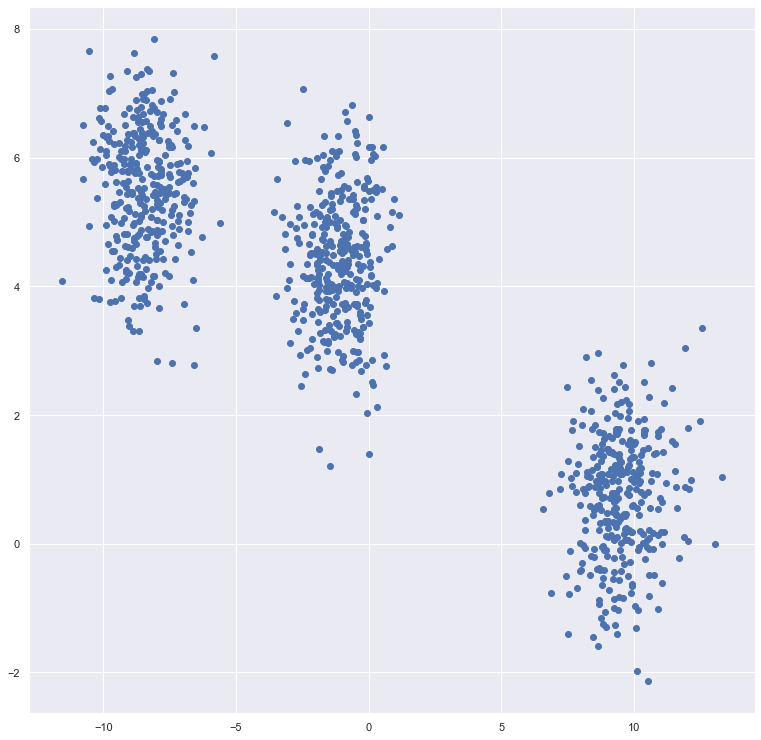

In [53]:

plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [54]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

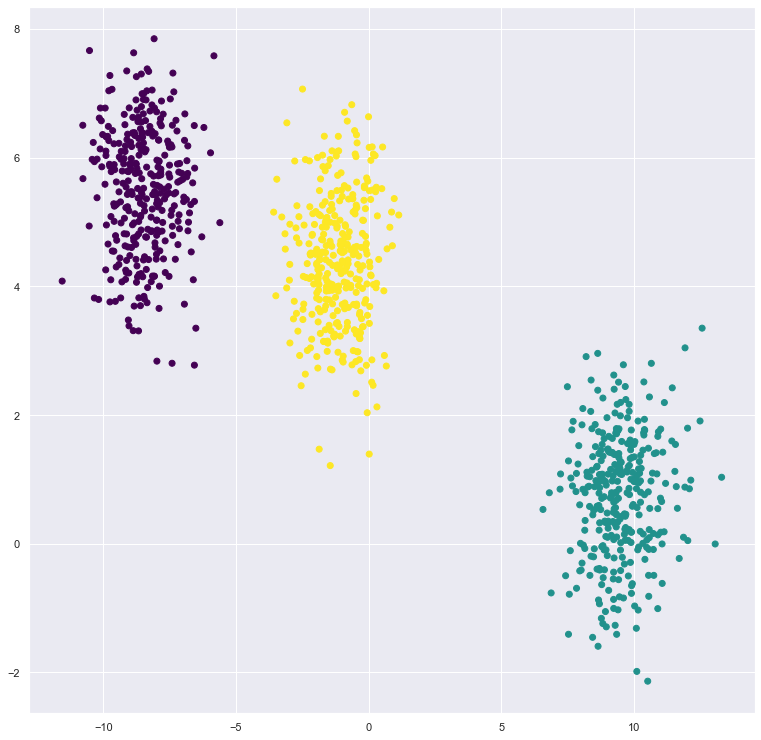

In [55]:
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

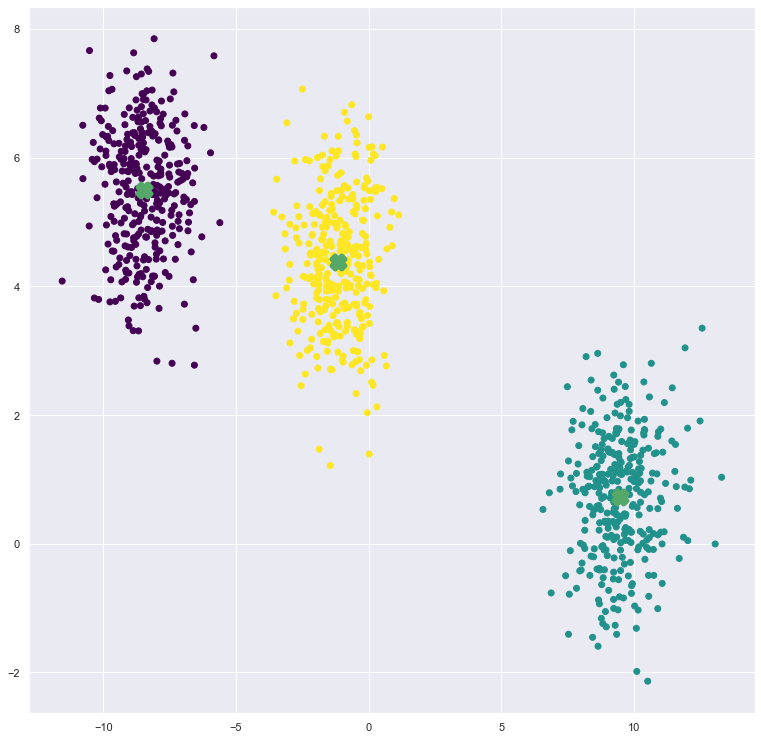

In [56]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')

plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

In [57]:

tsne=TSNE()

visualization=tsne.fit_transform(genres_scaled)
visualization

array([[  3.3446486,  66.285164 ],
       [-30.903864 , -56.014805 ],
       [ -9.9091215, -48.980587 ],
       ...,
       [ 15.330013 ,  -4.6263638],
       [ 23.877335 ,  66.36915  ],
       [-12.952885 , -13.50596  ]], dtype=float32)

<AxesSubplot:>

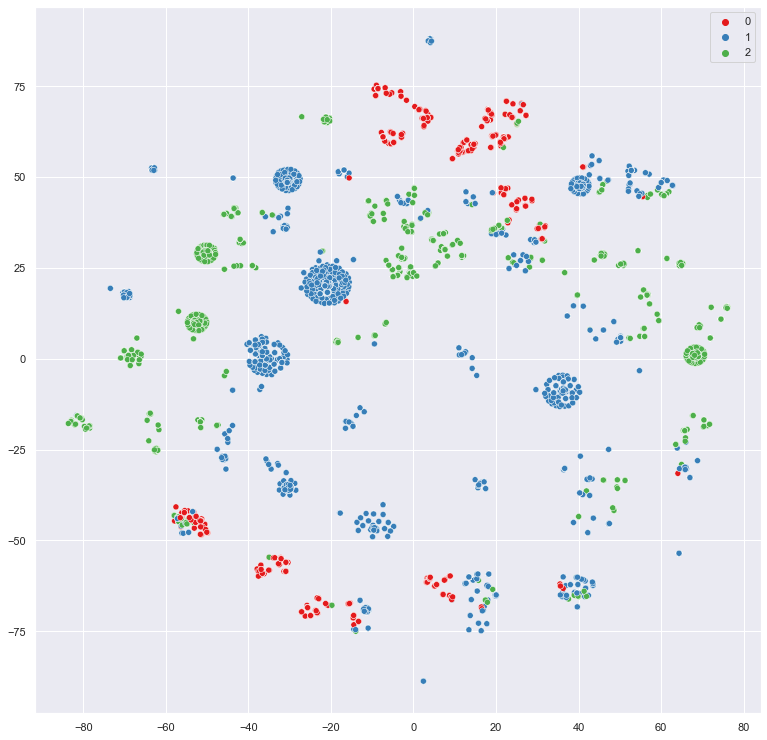

In [58]:
sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visualization[:,0],
                y=visualization[:,1],
                hue=model.labels_,
                palette=sns.color_palette('Set1',3))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>,
       <AxesSubplot:title={'center':'17'}>,
       <AxesSubplot:title={'center':'18'}>,
       <AxesSubplot:title={'center':'19'}>], dtype=object)

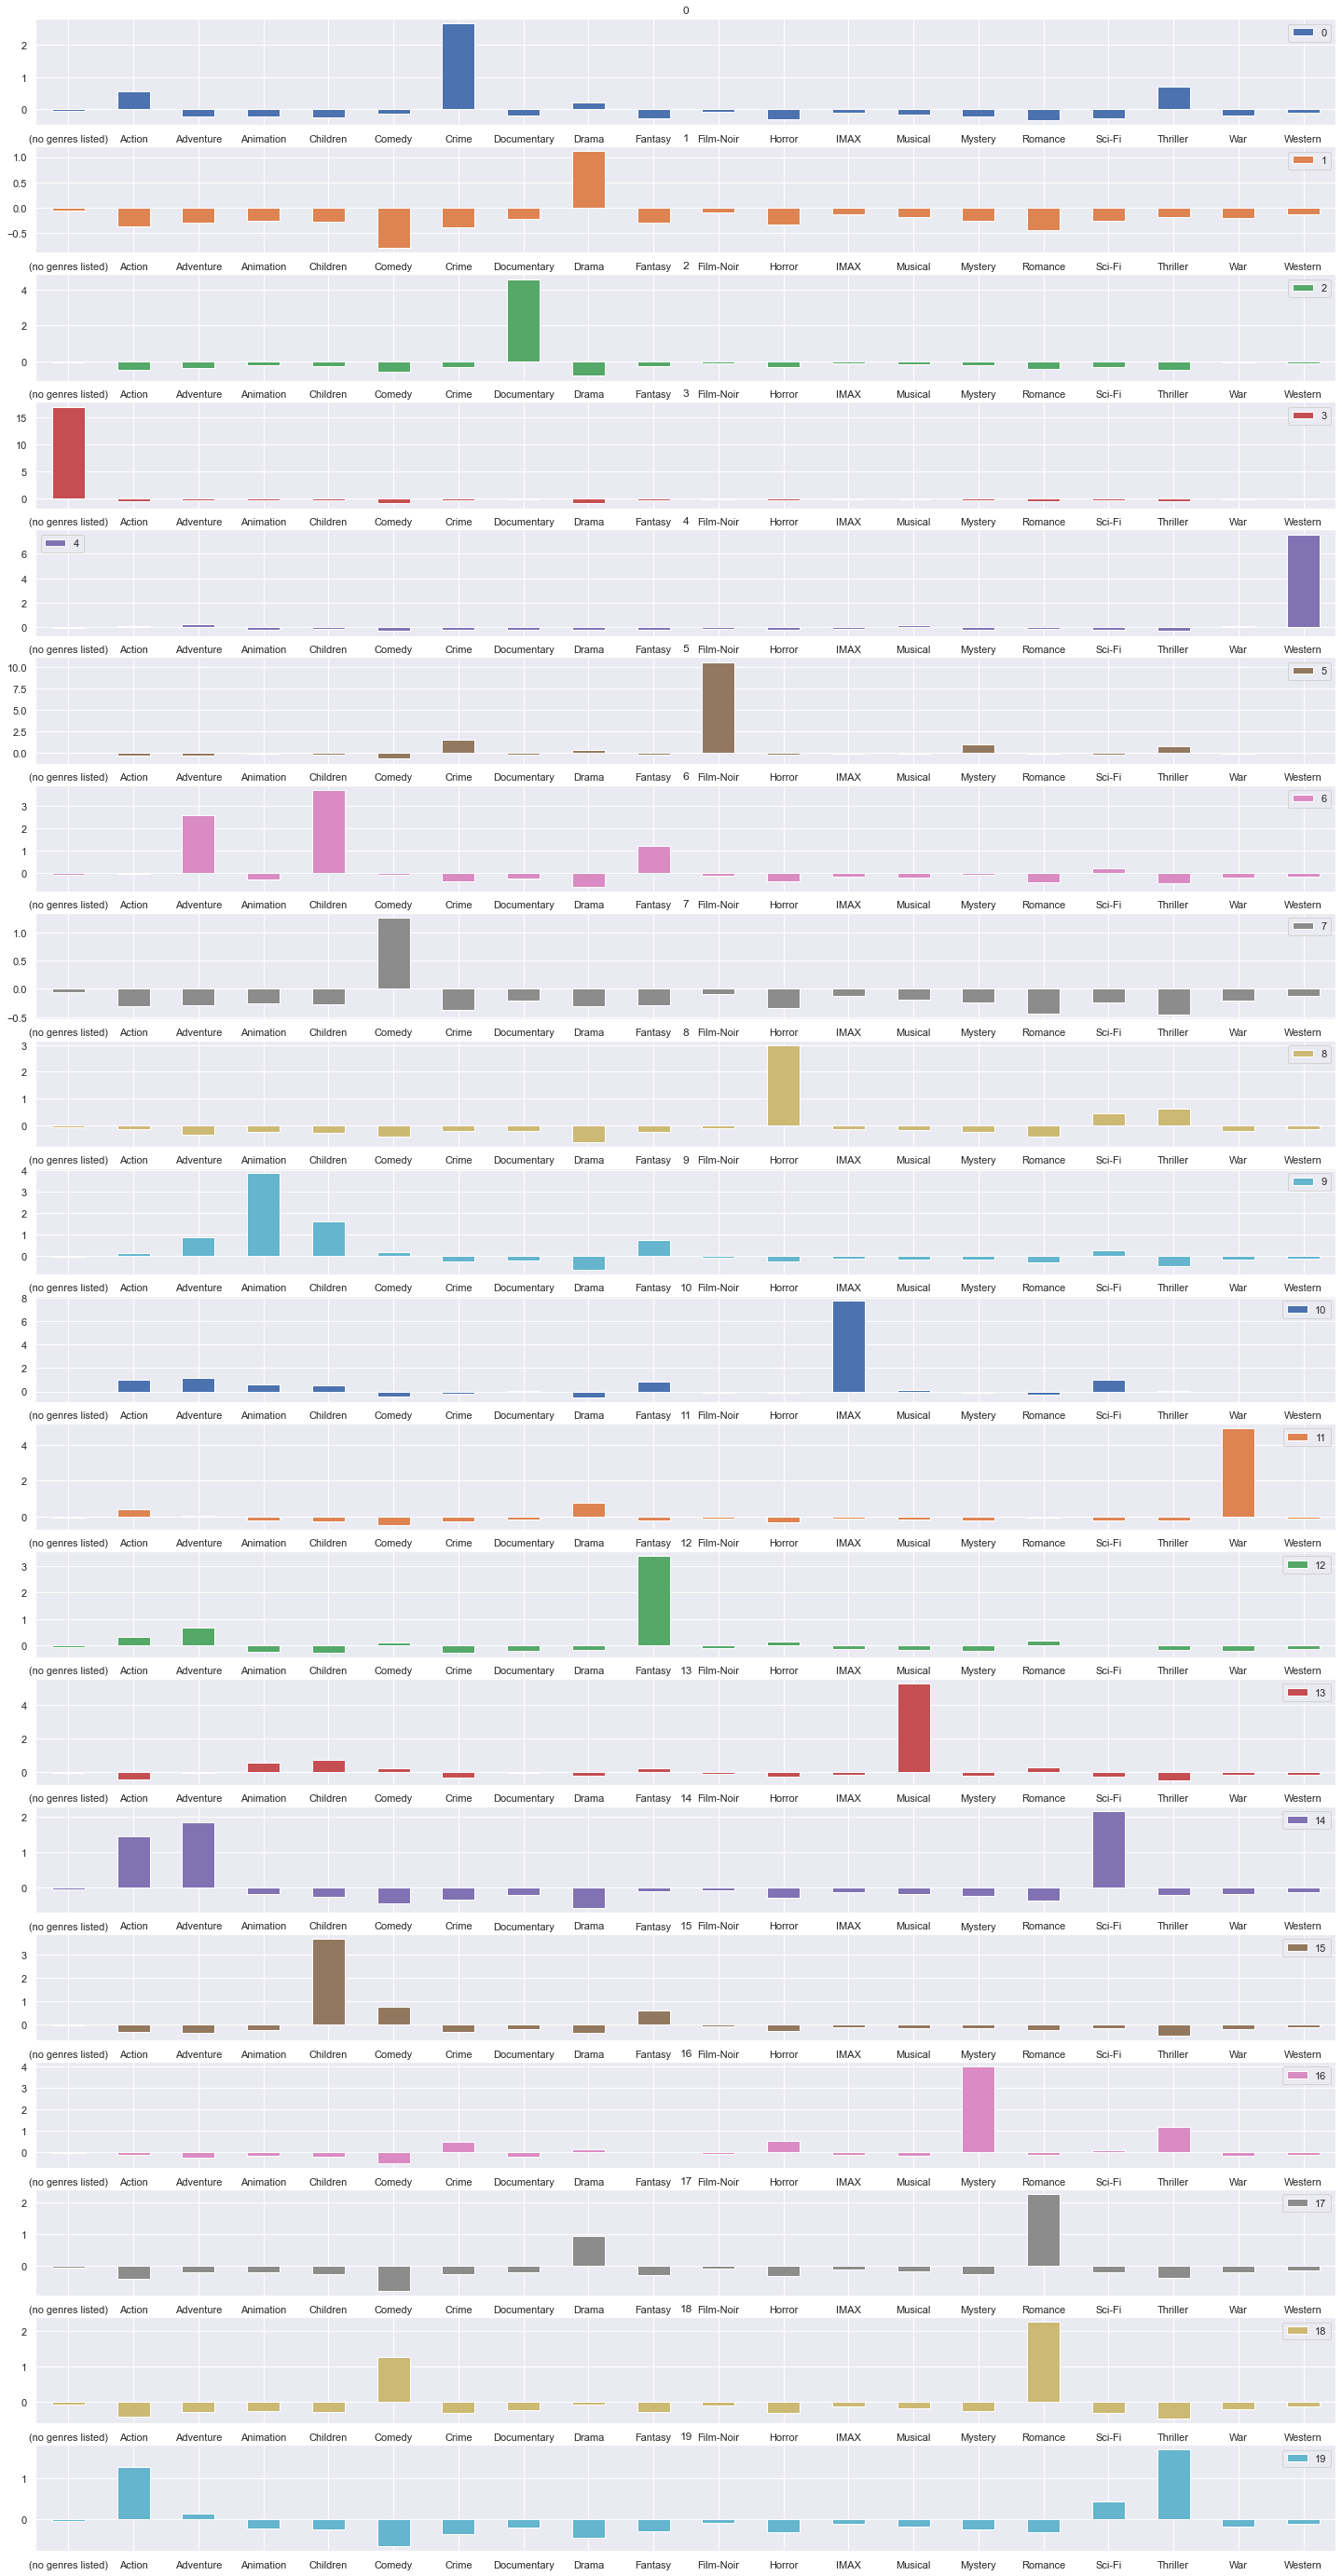

In [59]:
n_cluster=20
model=KMeans(n_cluster)
model.fit(genres_scaled)
group=pd.DataFrame(model.cluster_centers_,columns=genres.columns)
group.transpose().plot.bar(subplots=True,figsize=(25,50),sharex=False,rot=0)

In [60]:
group=2
filter=model.labels_==group
df_movies[filter]

movieId                                              title  \
69         77                                   Nico Icon (1995)   
87         99               Heidi Fleiss: Hollywood Madam (1995)   
96        108                                     Catwalk (1996)   
101       116                       Anne Frank Remembered (1995)   
110       128                              Jupiter's Wife (1994)   
...       ...                                                ...   
9690   184257                           Making a Murderer (2015)   
9711   187717                   Won't You Be My Neighbor? (2018)   
9719   189111                                      Spiral (2018)   
9730   190221  Hommage à Zgougou (et salut à Sabine Mamou) (2...   
9736   193579           Jon Stewart Has Left the Building (2015)   

                 genres  (no genres listed)  Action  Adventure  Animation  \
69          Documentary                   0       0          0          0   
87          Documentary                   0       0          0          0   
96          Documentary                   0       0          0          0   
101         Documentary                   0       0          0          0   
110         Documentary                   0       0          0          0   
...                 ...                 ...     ...        ...        ...   
9690  Crime|Documentary                   0       0          0          0   
9711        Documentary                   0       0          0          0   
9719        Documentary                   0       0          0          0   
9730        Documentary                   0       0          0          0   
9736        Documentary                   0       0          0          0   

      Children  Comedy  Crime  ...  Film-Noir  Horror  IMAX  Musical  Mystery  \
69           0       0      0  ...          0       0     0        0        0   
87           0       0      0  ...          0       0     0        0        0   
96           0       0      0  ...          0       0     0        0        0   
101          0       0      0  ...          0       0     0        0        0   
110          0       0      0  ...          0       0     0        0        0   
...        ...     ...    ...  ...        ...     ...   ...      ...      ...   
9690         0       0      1  ...          0       0     0        0        0   
9711         0       0      0  ...          0       0     0        0        0   
9719         0       0      0  ...          0       0     0        0        0   
9730         0       0      0  ...          0       0     0        0        0   
9736         0       0      0  ...          0       0     0        0        0   

      Romance  Sci-Fi  Thriller  War  Western  
69          0       0         0    0        0  
87          0       0         0    0        0  
96          0       0         0    0        0  
101         0       0         0    0        0  
110         0       0         0    0        0  
...       ...     ...       ...  ...      ...  
9690        0       0         0    0        0  
9711        0       0         0    0        0  
9719        0       0         0    0        0  
9730        0       0         0    0        0  
9736        0       0         0    0        0  

[417 rows x 23 columns]

In [65]:
def kmeans(n_clusters,genres):
    model=KMeans(n_clusters=n_clusters)
    model.fit(genres)
    return [n_clusters,model.inertia_]

In [66]:
result= [kmeans(number,genres_scaled) for number in range(1,40)]
result

[[1, 194839.9999999991],
 [2, 179451.57781431495],
 [3, 166146.7818134527],
 [4, 156772.54033889255],
 [5, 147559.92479726108],
 [6, 136704.30168210538],
 [7, 128934.95619036263],
 [8, 118394.33254656468],
 [9, 109467.65892404715],
 [10, 100777.60608492515],
 [11, 96150.69104806706],
 [12, 87732.25493272532],
 [13, 81183.69129502214],
 [14, 73894.82811358638],
 [15, 68595.9691537773],
 [16, 63610.33276731559],
 [17, 60891.7996018448],
 [18, 58813.83119090737],
 [19, 56976.648325759605],
 [20, 55967.871975189206],
 [21, 53178.975083307836],
 [22, 52135.05679855914],
 [23, 50156.61838861189],
 [24, 49027.9985708582],
 [25, 48199.963010974425],
 [26, 45872.71593260848],
 [27, 45815.96677476035],
 [28, 45129.78107940008],
 [29, 43995.88788456405],
 [30, 43606.26157689479],
 [31, 41358.31841653899],
 [32, 41023.86036800785],
 [33, 39741.24716270935],
 [34, 39417.011652487796],
 [35, 38531.7699849813],
 [36, 37953.59052312944],
 [37, 36923.64137721489],
 [38, 36068.83055351377],
 [39, 35960.

In [67]:
result=pd.DataFrame(result,columns=['groups','inertia'])
result

groups        inertia
0        1  194840.000000
1        2  179451.577814
2        3  166146.781813
3        4  156772.540339
4        5  147559.924797
5        6  136704.301682
6        7  128934.956190
7        8  118394.332547
8        9  109467.658924
9       10  100777.606085
10      11   96150.691048
11      12   87732.254933
12      13   81183.691295
13      14   73894.828114
14      15   68595.969154
15      16   63610.332767
16      17   60891.799602
17      18   58813.831191
18      19   56976.648326
19      20   55967.871975
20      21   53178.975083
21      22   52135.056799
22      23   50156.618389
23      24   49027.998571
24      25   48199.963011
25      26   45872.715933
26      27   45815.966775
27      28   45129.781079
28      29   43995.887885
29      30   43606.261577
30      31   41358.318417
31      32   41023.860368
32      33   39741.247163
33      34   39417.011652
34      35   38531.769985
35      36   37953.590523
36      37   36923.641377
37      38   36068.830554
38      39   35960.724837

<AxesSubplot:>

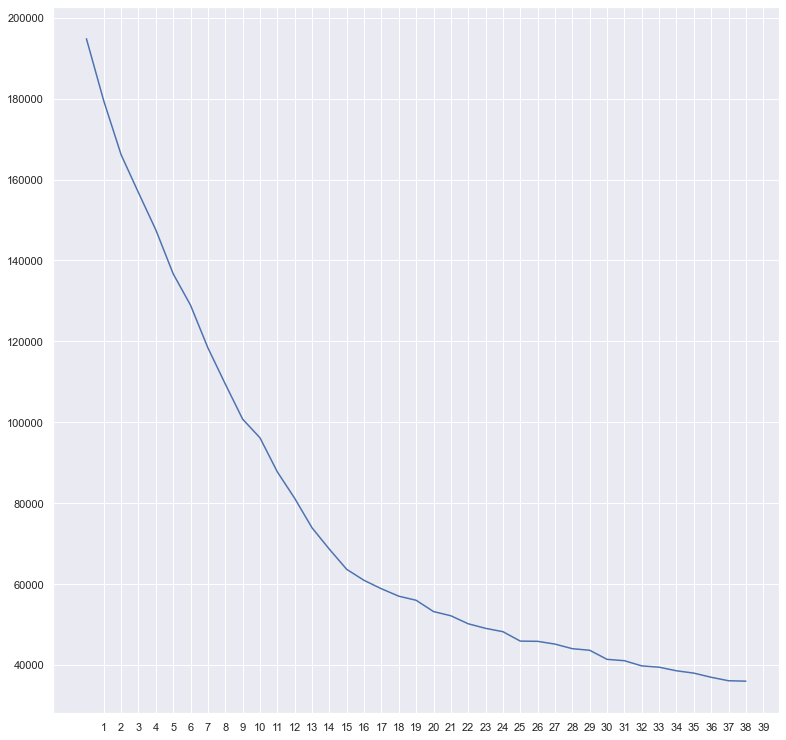

In [70]:
result.inertia.plot(xticks=result.groups)

#elbow method

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>], dtype=object)

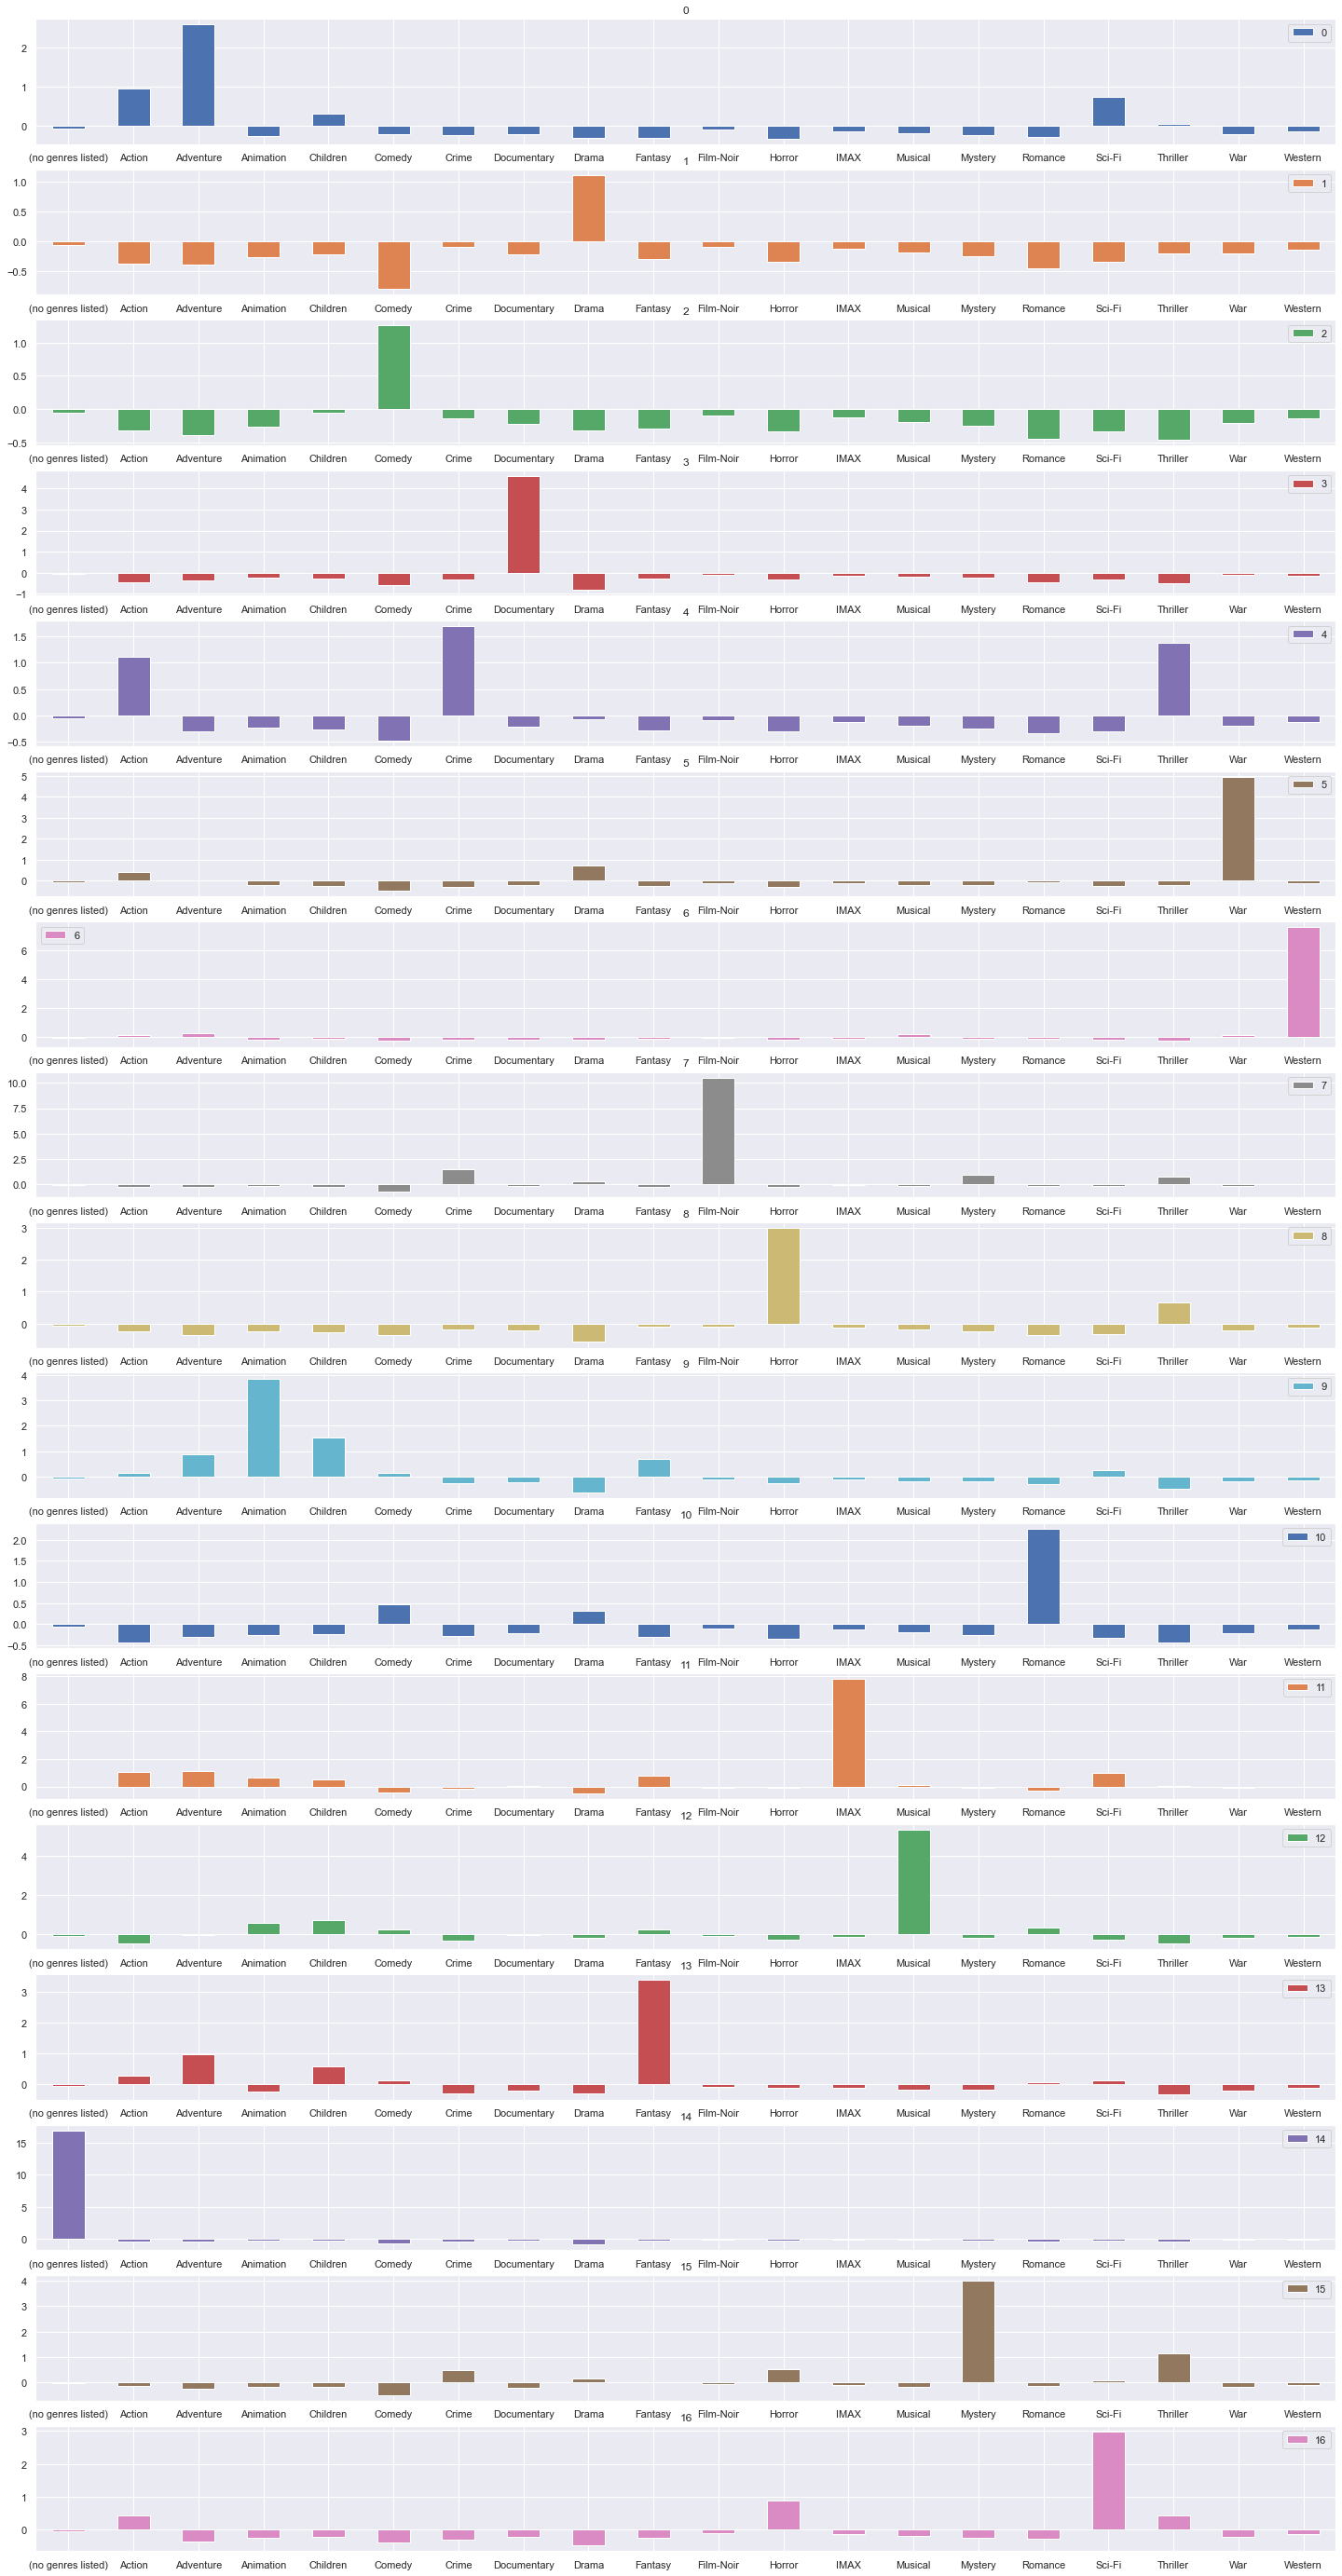

In [71]:
n_cluster=17
model=KMeans(n_cluster)
model.fit(genres_scaled)
group=pd.DataFrame(model.cluster_centers_,columns=genres.columns)
group.transpose().plot.bar(subplots=True,figsize=(25,50),sharex=False,rot=0)

In [73]:
model=AgglomerativeClustering(n_clusters=17)
groups=model.fit_predict(genres_scaled)
groups


array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

In [74]:
tsne=TSNE()

visualization=tsne.fit_transform(genres_scaled)
visualization

array([[ 60.944935 , -24.73983  ],
       [-74.132675 , -17.607365 ],
       [ 22.812548 , -15.354503 ],
       ...,
       [-11.091584 ,  14.699973 ],
       [ 44.253    ,  -0.5918083],
       [ -5.9384246, -18.207796 ]], dtype=float32)

<AxesSubplot:>

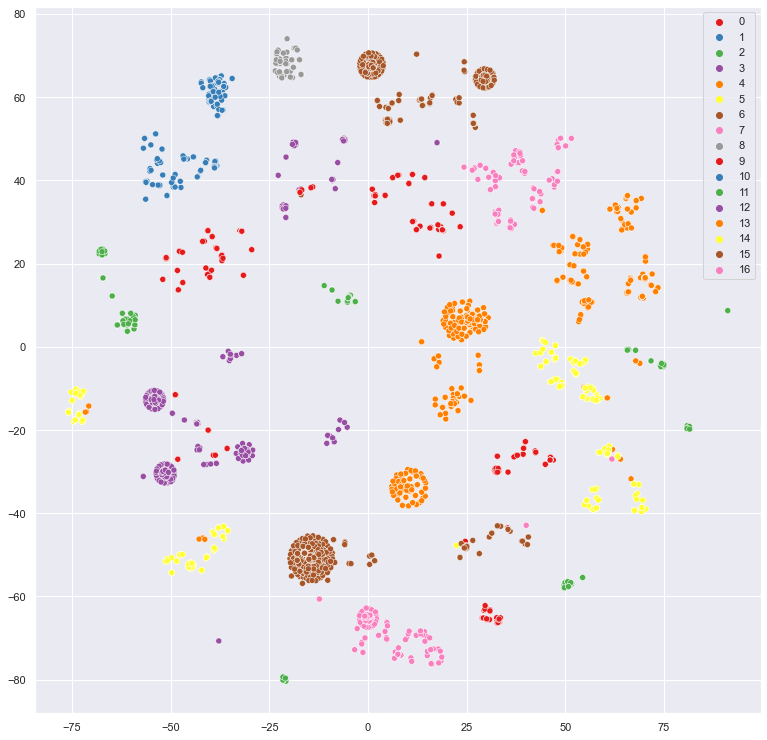

In [81]:
#sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visualization[:,0],
                y=visualization[:,1],
                hue=model.labels_,
                palette=sns.color_palette('Set1',17))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>], dtype=object)

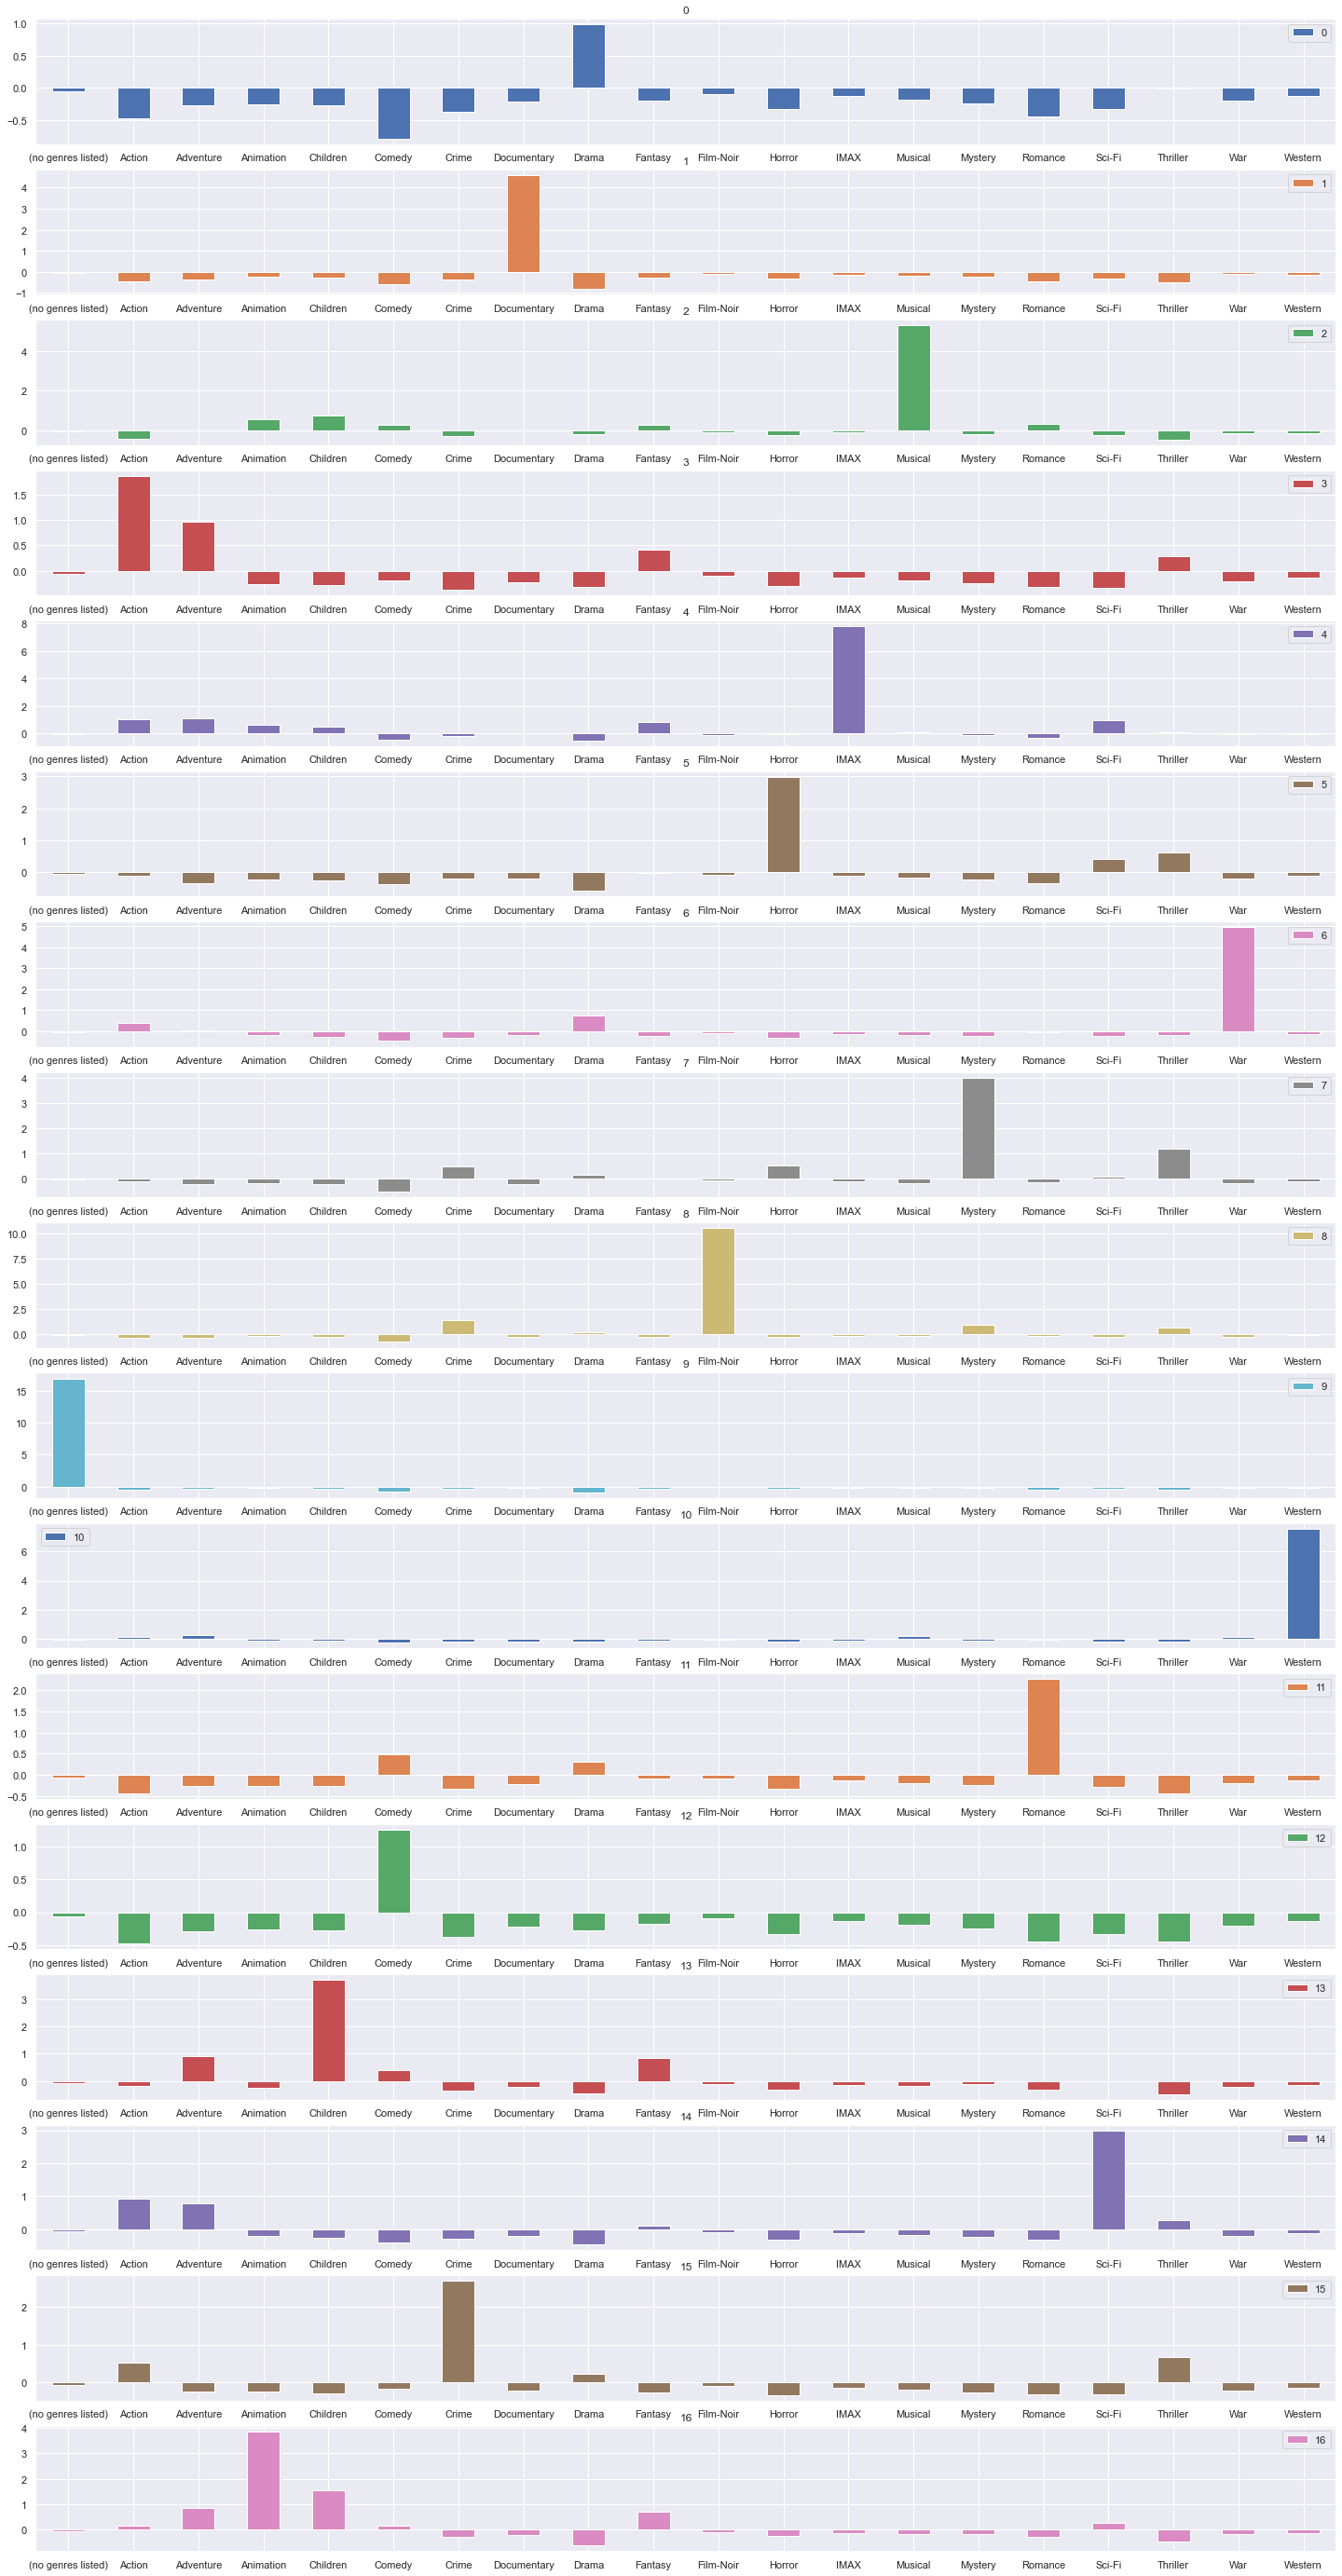

In [85]:
n_cluster=17
model=KMeans(n_cluster)
model.fit(genres_scaled)
group=pd.DataFrame(model.cluster_centers_,columns=genres.columns)
group.transpose().plot.bar(subplots=True,figsize=(25,50),sharex=False,rot=0)

In [91]:
distance_matrix=linkage(group)
distance_matrix

array([[ 0.        , 12.        ,  2.44709334,  2.        ],
       [11.        , 17.        ,  2.87486214,  3.        ],
       [ 3.        , 18.        ,  3.08883723,  4.        ],
       [15.        , 19.        ,  3.42459073,  5.        ],
       [14.        , 20.        ,  3.48481703,  6.        ],
       [ 5.        , 21.        ,  3.85365297,  7.        ],
       [13.        , 22.        ,  4.39223858,  8.        ],
       [16.        , 23.        ,  4.67707328,  9.        ],
       [ 7.        , 24.        ,  4.70062025, 10.        ],
       [ 1.        , 25.        ,  5.16630134, 11.        ],
       [ 6.        , 26.        ,  5.27199281, 12.        ],
       [ 2.        , 27.        ,  5.8147182 , 13.        ],
       [10.        , 28.        ,  7.88042977, 14.        ],
       [ 4.        , 29.        ,  8.18756161, 15.        ],
       [ 8.        , 30.        , 10.81656652, 16.        ],
       [ 9.        , 31.        , 17.06858434, 17.        ]])

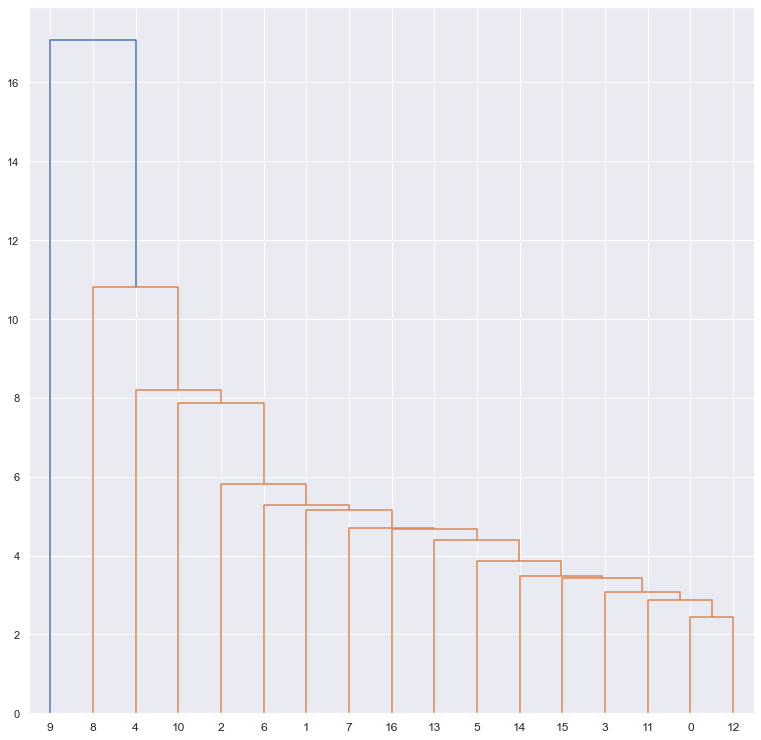

In [101]:
Dendrogram=dendrogram(distance_matrix)

In [ ]:
g